In [1]:
import numpy as np
import pandas as pd
# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from math import inf

# TODO 1: Useful Functions

In [2]:
# Data to test the functions below
# I use a simple Bernoulli with success probability = 0.8
samples = 10000
x = np.random.binomial(1, 0.4, size=(samples,1))

In [3]:
def extract_rv_alphabet_and_pmd(x : np.ndarray) -> tuple:
    '''
    Returns an ordered array containing all the elements that occur at least once
    in the array x.
    AND
    Returns an array [p_x[0], p_x[1],..., p_x[n]] where 0 is the generic "first symbol"
    of the alphabet of x, and n is the generic "last symbol" of the alphabet A_x
    '''
    alphabet, counts = np.unique(x, return_counts=True)
    
    x.reshape((-1,1))
    pmd = np.divide(counts, x.shape[0]) # Normalization: (# Occurences)/(Tot # of samples)
    
    return alphabet, pmd

# Auxiliary function
def compute_information_bits(x : np.ndarray) -> np.ndarray:
    '''
    Returns an array as the one of the pmds: [i_x[0], i_x[1],...,i_x[n]]
    '''
    _, pmd = extract_rv_alphabet_and_pmd(x) #[p_x[0], p_x[1],..., p_x[n]]
    reciprocal_pmd = np.reciprocal(pmd) #[1/p_x[0], 1/p_x[1],..., 1/p_x[n]]
    information_bits = np.log2(reciprocal_pmd)
    
    return information_bits    

alphabet, pmd = extract_rv_alphabet_and_pmd(x)
print(alphabet)
print(pmd)
print(compute_information_bits(x))

[0 1]
[0.5937 0.4063]
[0.75219398 1.29938273]


In [4]:
def compute_shannon_entropy(x : np.ndarray) -> float:
    '''
    Function that computes the Shannon Entropy H(x) = E[i_x(x)]
    '''
    _, pmd = extract_rv_alphabet_and_pmd(x)
    information = compute_information_bits(x)
    H_x = 0
    for probability, info_bits in zip(pmd, information):
        H_x = H_x + probability * info_bits
    return H_x

print(compute_shannon_entropy(x))

0.9745167703116


In [5]:
def compute_collision_probability(x : np.ndarray) -> float:
    '''
    Function that computes the Collision Probability: P_coll(x) = \sum_{Alphabet} [p_x(a)]^2
    '''
    _, pmd = extract_rv_alphabet_and_pmd(x)
    pmd_square = np.power(pmd, 2)
    collision_probability = np.sum(pmd_square)
    return collision_probability    

def compute_collision_entropy(x : np.ndarray) -> float:
    '''
    Function that computes the Collision Entropy H_2(x) = \sum_{a \in A_x} [p_x(a)]^2
    '''
    collision_probability = compute_collision_probability(x)
    collision_entropy = np.log2(1/collision_probability)
    return collision_entropy
    
print(compute_collision_probability(x))
print(compute_collision_entropy(x))

0.51755938
0.9502037012280464


In [6]:
def compute_guessing_entropy(x : np.ndarray) -> float:
    '''
    Function that compute the Guessing Entropy: H_min(x) = min_{Alphabet} i_x(a)
    '''
    information = compute_information_bits(x)
    min_information = min(information)
    return min_information

print(compute_guessing_entropy(x))

0.7521939817807812


In [7]:
def single_rv_estimates(x : np.ndarray, verbose = False) -> tuple:
    '''
    Function that returns:
    - Alphabet
    - PMD
    - Shannon Entropy
    - Collision Entropy
    - Guessing Entropy
    of the single r.v. x.
    Set verbose to 'False' if you don't want the function to print anything.
    '''
    alphabet, pmd = extract_rv_alphabet_and_pmd(x)
    H_x = compute_shannon_entropy(x)
    H_coll = compute_collision_entropy(x)
    H_min = compute_guessing_entropy(x)
    
    if verbose == True:
        print('##################################################')
        print(f"""Your random variable has:
        - Alphabet: {alphabet}
        - with corresponding PMDs: {pmd}
        - Shannon Entropy: {H_x}
        - Collision Entropy: {H_coll}
        - Guessing Entropy: {H_min}""")
        print('##################################################')
    
    return alphabet, pmd, H_x, H_coll, H_min

single_rv_estimates(x, verbose = True)

##################################################
Your random variable has:
        - Alphabet: [0 1]
        - with corresponding PMDs: [0.5937 0.4063]
        - Shannon Entropy: 0.9745167703116
        - Collision Entropy: 0.9502037012280464
        - Guessing Entropy: 0.7521939817807812
##################################################


(array([0, 1]),
 array([0.5937, 0.4063]),
 0.9745167703116,
 0.9502037012280464,
 0.7521939817807812)

# TODO 2: Test Functions

In [8]:
##### GENERATE RANDOM SEQUENCES #####

def generate_uniform(start : int, stop : int, samples = 1000) -> np.ndarray:
    '''
    Function that generates an array of samples drawn by a uniform distribution.
    Parameters:
    - start: first symbol of the Alphabet (included)
    - stop: last symbol of the alphabet (included)
    - samples: number of samples and dimension of the output vector
    '''
    x_uniform = np.random.randint(start, stop+1, size=(samples,1))
    return x_uniform

def generate_binomial(q : float, samples = 1000) -> np.ndarray:
    '''
    Function that generates an array of samples drawn by a binomial distribution.
    Parameters:
    - q: probability of failure
    - samples: number of samples and dimension of the output vector
    '''
    p = 1-q
    x_binomial = np.random.binomial(1, p, size=(samples,1))
    return x_binomial

def generate_geometric(p_failure : float, samples = 1000) -> np.ndarray:
    '''
    Function that generates an array of samples drawn by a geometric distribution.
    Parameters:
    - p_failure: probability of "failure"
    - samples: number of samples and dimension of the output vector
    '''
    p = 1 - p_failure # probability of success (uniform with the python docs)
    x_geometric = np.random.geometric(p, size=(samples,1))
    return x_geometric

In [9]:
##### COMPUTE "TRUE" ENTROPIES #####

def compute_true_uniform_entropies(start : int, stop : int) -> tuple:
    '''
    Function that computes the 3 entropies defined above for a "theoretical"
    uniform random variable.
    '''
    alphabet_cardinality = stop - start + 1 # since stop is not included!
    H_x = np.log2(alphabet_cardinality)
    H_min = H_x
    H_coll = H_x
    return H_x, H_coll, H_min

def compute_true_binomial_entropies(q : float) -> tuple:
    '''
    Function that computes the 3 entropies defined above for a "theoretical"
    binomial random variable.
    '''
    p = 1-q
    info_success = np.log2(1/p)
    info_failure = np.log2(1/(1-p))
    H_x = p * info_success + (1-p) * info_failure
    H_min = min(info_success, info_failure)
    P_coll = 2*(p**2) - 2*p + 1
    H_coll = np.log2(1/P_coll)
    
    return H_x, H_coll, H_min

def compute_true_geometric_entropies(p_failure : float) -> tuple:
    '''
    Function that computes the 3 entropies defined above for a "theoretical"
    geometric random variable.
    '''
    p = 1 - p_failure # consistent notation with the Bernoulli
#     H_x = -np.log2(p) - ((1-p)*np.log2(1-p)/p)
    H_x = ((p-1)/p)*np.log2(1-p) - np.log2(p)
    H_min = np.log2(1/p)
    P_coll = (p**2/(-p**2+2*p))
    H_coll = np.log2(1/P_coll)
    
    return H_x, H_coll, H_min

## 2.1 Tests on Uniform r.v.

### 2.1.1 Varying M
 Note that all the considered entropies are theoretically the same, but the estimates behave differently from case to case.

<Figure size 432x288 with 0 Axes>

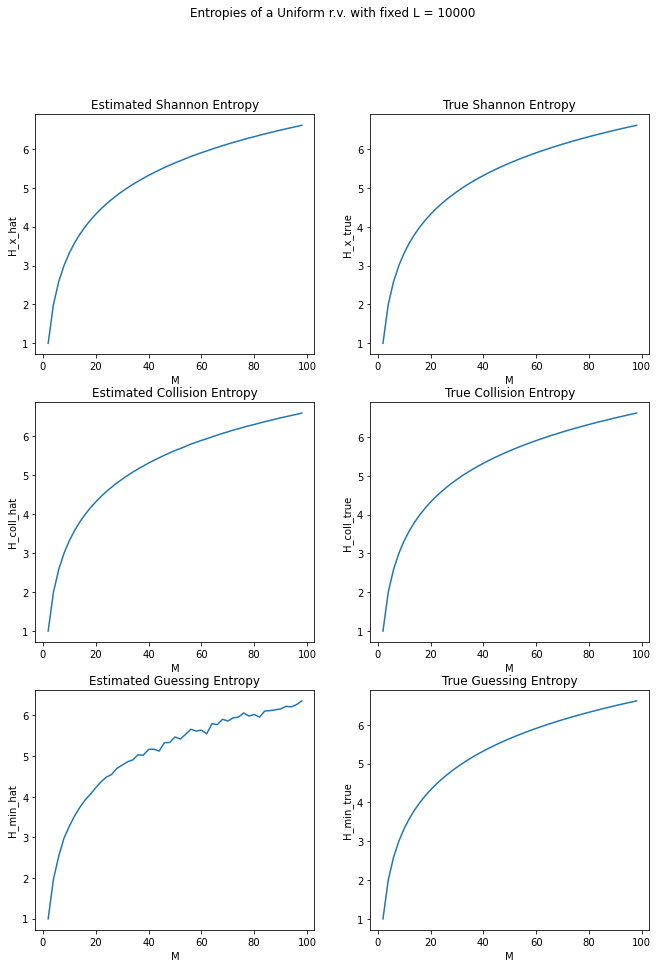

<Figure size 432x288 with 0 Axes>

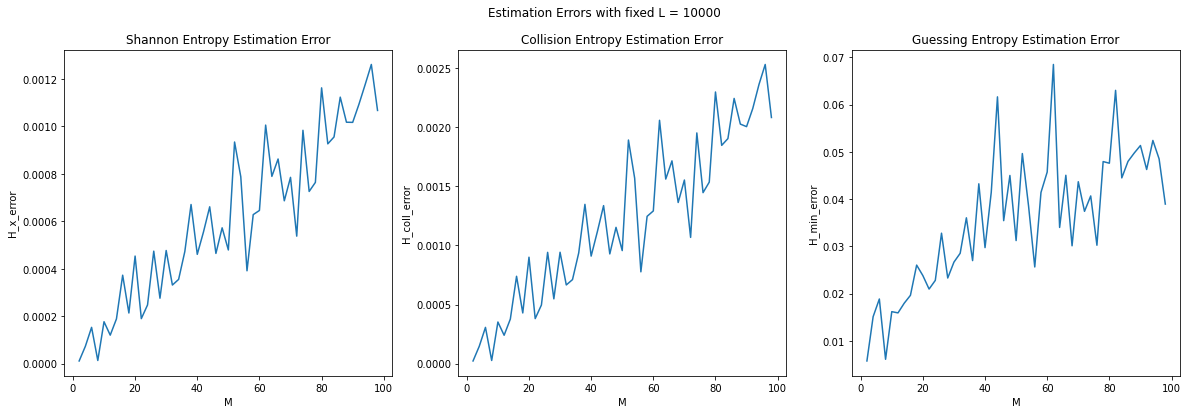

In [10]:
M_grid = np.arange(2, 100, 2) # Grid of values for the parameter M
L = 10000 # For now fixed L

# EMPTY LISTS FOR PLOTS
## Entropies Estimates Absolute Values
H_x_hat_list = []
H_min_hat_list = []
H_coll_hat_list = []
## True Entropies Absolute Values
H_x_list = []
H_min_list = []
H_coll_list = []
## Estimation Errors
epsilon_H_x = []
epsilon_H_min = []
epsilon_H_coll = []

for M in M_grid:
    x_uniform = generate_uniform(1, M, samples = L)
    
    # Entropy Estimates
    _, _, H_x_hat, H_coll_hat, H_min_hat = single_rv_estimates(x_uniform, verbose=False)
    # "True" Entropies
    H_x_true, H_coll_true, H_min_true = compute_true_uniform_entropies(1,M)
    
    # Appends the values to the lists above:
    ## Entropies Estimates Absolute Values
    H_x_hat_list.append(H_x_hat)
    H_min_hat_list.append(H_min_hat)
    H_coll_hat_list.append(H_coll_hat)
    ## True Entropies Absolute Values
    H_x_list.append(H_x_true)
    H_min_list.append(H_min_true)
    H_coll_list.append(H_coll_true)
    ## Estimation Errors
    epsilon_H_x.append(np.absolute(H_x_hat - H_x_true)/H_x_true)
    epsilon_H_min.append(np.absolute(H_min_hat - H_min_true)/H_min_true)
    epsilon_H_coll.append(np.absolute(H_coll_hat - H_coll_true)/H_coll_true)

# "ABSOLUTE" PLOTS
plt.figure()
fig, axs = plt.subplots(3,2)
fig.suptitle(f'Entropies of a Uniform r.v. with fixed L = {L}')
## Shannon Estimate
axs[0,0].plot(M_grid, H_x_hat_list)
axs[0,0].set(xlabel='M', ylabel='H_x_hat')
axs[0,0].set_title('Estimated Shannon Entropy')
## Shannon True
axs[0,1].plot(M_grid, H_x_list)
axs[0,1].set(xlabel='M', ylabel='H_x_true')
axs[0,1].set_title('True Shannon Entropy')
## Guessing Estimate
axs[1,0].plot(M_grid, H_coll_hat_list)
axs[1,0].set(xlabel='M', ylabel='H_coll_hat')
axs[1,0].set_title('Estimated Collision Entropy')
## Guessing True
axs[1,1].plot(M_grid, H_coll_list)
axs[1,1].set(xlabel='M', ylabel='H_coll_true')
axs[1,1].set_title('True Collision Entropy')
## Collision Estimate
axs[2,0].plot(M_grid, H_min_hat_list)
axs[2,0].set(xlabel='M', ylabel='H_min_hat')
axs[2,0].set_title('Estimated Guessing Entropy')
## Collision True
axs[2,1].plot(M_grid, H_min_list)
axs[2,1].set(xlabel='M', ylabel='H_min_true')
axs[2,1].set_title('True Guessing Entropy')

fig.set_figheight(15)
fig.set_figwidth(11)

# ESTIMATION ERRORS PLOTS
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle(f'Estimation Errors with fixed L = {L}')
## Shannon
ax1.plot(M_grid, epsilon_H_x)
ax1.set(xlabel='M', ylabel='H_x_error')
ax1.set_title('Shannon Entropy Estimation Error')
## Guessing
ax2.plot(M_grid, epsilon_H_coll)
ax2.set(xlabel='M', ylabel='H_coll_error')
ax2.set_title('Collision Entropy Estimation Error')
## Collision
ax3.plot(M_grid, epsilon_H_min)
ax3.set(xlabel='M', ylabel='H_min_error')
ax3.set_title('Guessing Entropy Estimation Error')

fig.set_figheight(6)
fig.set_figwidth(20)

### 2.1.2 Varying L
Note **again** that all the considered entropies are theoretically the same, but the estimates behave differently from case to case.

<Figure size 432x288 with 0 Axes>

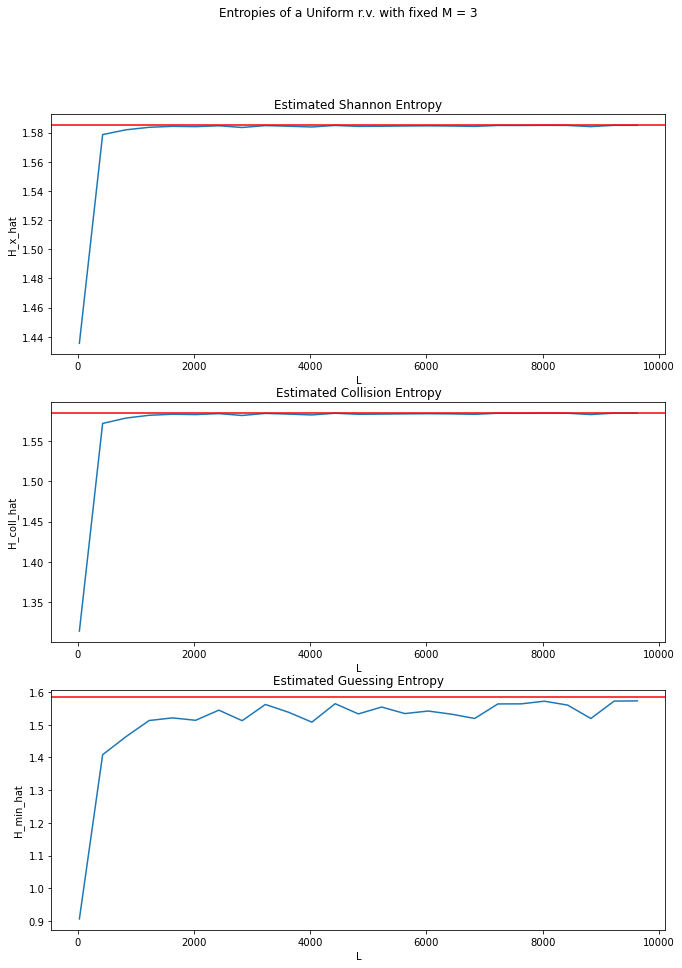

<Figure size 432x288 with 0 Axes>

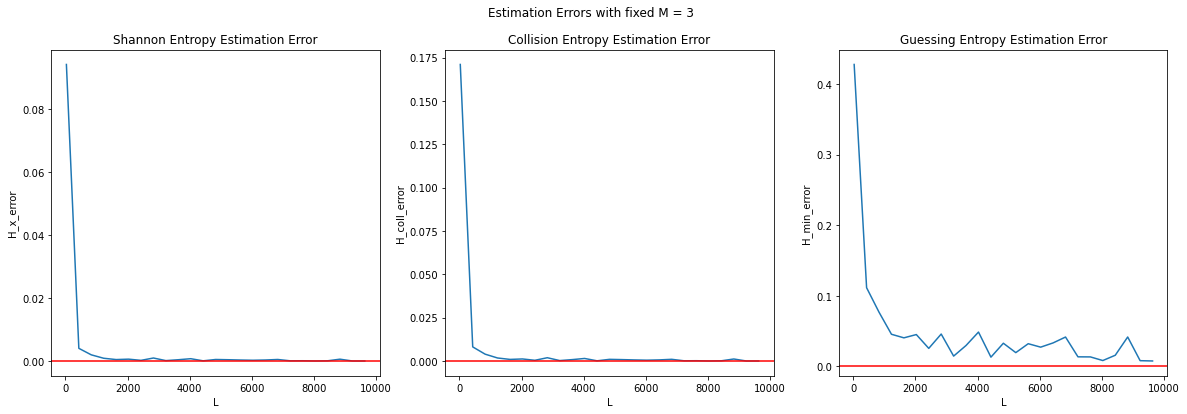

In [11]:
M = 3 # Fixed M
L_grid = np.arange(30, 10000, 400) # Grid of values for L

# EMPTY LISTS FOR PLOTS
## Entropies Estimates Absolute Values
H_x_hat_list = []
H_min_hat_list = []
H_coll_hat_list = []
## True Entropies Absolute Values
H_x_list = []
H_min_list = []
H_coll_list = []
## Estimation Errors
epsilon_H_x = []
epsilon_H_min = []
epsilon_H_coll = []

# "True" Entropies
H_x_true, H_coll_true, H_min_true = compute_true_uniform_entropies(1,M)

for L in L_grid:
    x_uniform = generate_uniform(1, M, samples = L)
    
    # Entropy Estimates
    _, _, H_x_hat, H_coll_hat, H_min_hat = single_rv_estimates(x_uniform, verbose=False)
    
    # Appends the values to the lists above:
    ## Entropies Estimates Absolute Values
    H_x_hat_list.append(H_x_hat)
    H_min_hat_list.append(H_min_hat)
    H_coll_hat_list.append(H_coll_hat)
    ## Estimation Errors
    epsilon_H_x.append(np.absolute(H_x_hat - H_x_true)/H_x_true)
    epsilon_H_min.append(np.absolute(H_min_hat - H_min_true)/H_min_true)
    epsilon_H_coll.append(np.absolute(H_coll_hat - H_coll_true)/H_coll_true)
    
# "ABSOLUTE" PLOTS
plt.figure()
fig, axs = plt.subplots(3)
fig.suptitle(f'Entropies of a Uniform r.v. with fixed M = {M}')

## Shannon Estimate
axs[0].plot(L_grid, H_x_hat_list)
axs[0].axhline(y=H_x_true, color='r')
axs[0].set(xlabel='L', ylabel='H_x_hat')
axs[0].set_title('Estimated Shannon Entropy')
## Guessing Estimate
axs[1].plot(L_grid, H_coll_hat_list)
axs[1].axhline(y=H_coll_true, color='r')
axs[1].set(xlabel='L', ylabel='H_coll_hat')
axs[1].set_title('Estimated Collision Entropy')
## Collision Estimate
axs[2].plot(L_grid, H_min_hat_list)
axs[2].axhline(y=H_min_true, color='r')
axs[2].set(xlabel='L', ylabel='H_min_hat')
axs[2].set_title('Estimated Guessing Entropy')

fig.set_figheight(15)
fig.set_figwidth(11)

# ESTIMATION ERRORS PLOTS
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle(f'Estimation Errors with fixed M = {M}')
## Shannon
ax1.plot(L_grid, epsilon_H_x)
ax1.axhline(y=0, color='r')
ax1.set(xlabel='L', ylabel='H_x_error')
ax1.set_title('Shannon Entropy Estimation Error')
## Guessing
ax2.plot(L_grid, epsilon_H_coll)
ax2.axhline(y=0, color='r')
ax2.set(xlabel='L', ylabel='H_coll_error')
ax2.set_title('Collision Entropy Estimation Error')
## Collision
ax3.plot(L_grid, epsilon_H_min)
ax3.axhline(y=0, color='r')
ax3.set(xlabel='L', ylabel='H_min_error')
ax3.set_title('Guessing Entropy Estimation Error')

fig.set_figheight(6)
fig.set_figwidth(20)

## 2.2 Tests on Binary r.v.

### 2.2.1 Varying q

/tmp/ipykernel_11594/1389143169.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  info_failure = np.log2(1/(1-p))
/tmp/ipykernel_11594/1389143169.py:22: RuntimeWarning: invalid value encountered in double_scalars
  H_x = p * info_success + (1-p) * info_failure
/tmp/ipykernel_11594/1254833357.py:37: RuntimeWarning: invalid value encountered in double_scalars
  epsilon_H_min.append(np.absolute(H_min_hat - H_min_true)/H_min_true)
/tmp/ipykernel_11594/1254833357.py:38: RuntimeWarning: invalid value encountered in double_scalars
  epsilon_H_coll.append(np.absolute(H_coll_hat - H_coll_true)/H_coll_true)
/tmp/ipykernel_11594/1389143169.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  info_success = np.log2(1/p)


<Figure size 432x288 with 0 Axes>

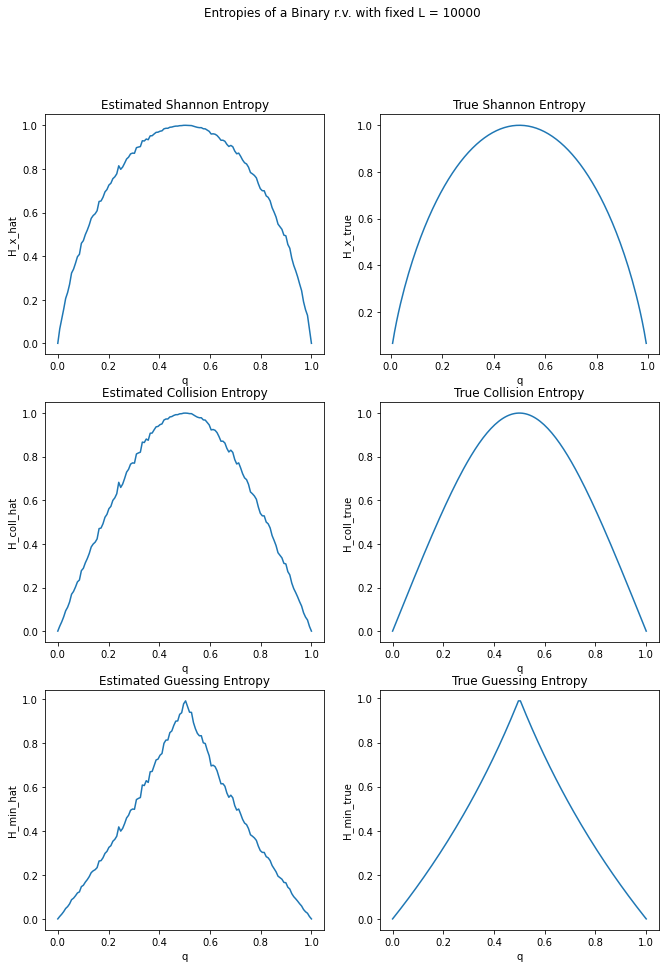

<Figure size 432x288 with 0 Axes>

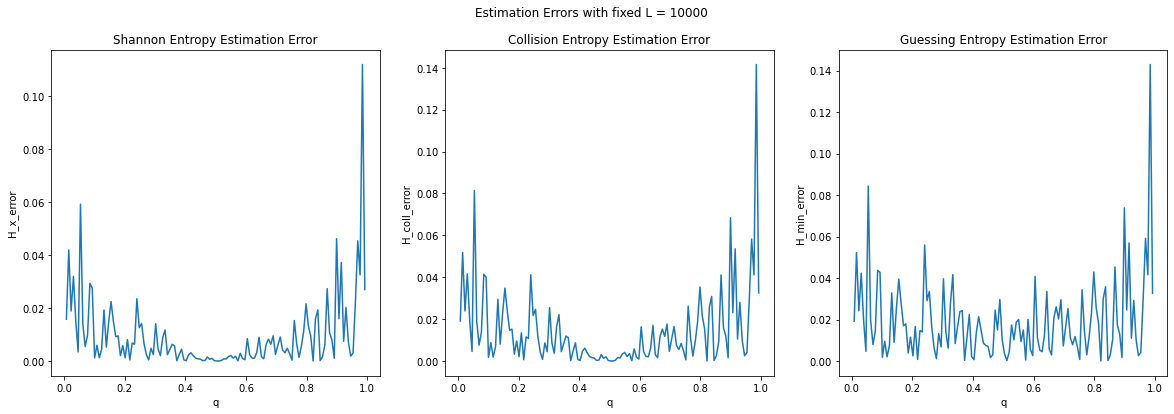

In [12]:
q_grid = np.linspace(0, 1, num=130) # Grid of values for the parameter q
L = 10000 # For now fixed L

# EMPTY LISTS FOR PLOTS
## Entropies Estimates Absolute Values
H_x_hat_list = []
H_min_hat_list = []
H_coll_hat_list = []
## True Entropies Absolute Values
H_x_list = []
H_min_list = []
H_coll_list = []
## Estimation Errors
epsilon_H_x = []
epsilon_H_min = []
epsilon_H_coll = []

for q in q_grid:
    x_binary = generate_binomial(q, samples = L)
    
    # Entropy Estimates
    _, _, H_x_hat, H_coll_hat, H_min_hat = single_rv_estimates(x_binary, verbose=False)
    # "True" Entropies
    H_x_true, H_coll_true, H_min_true = compute_true_binomial_entropies(q)
    
    # Appends the values to the lists above:
    ## Entropies Estimates Absolute Values
    H_x_hat_list.append(H_x_hat)
    H_min_hat_list.append(H_min_hat)
    H_coll_hat_list.append(H_coll_hat)
    ## True Entropies Absolute Values
    H_x_list.append(H_x_true)
    H_min_list.append(H_min_true)
    H_coll_list.append(H_coll_true)
    ## Estimation Errors
    epsilon_H_x.append(np.absolute(H_x_hat - H_x_true)/H_x_true)
    epsilon_H_min.append(np.absolute(H_min_hat - H_min_true)/H_min_true)
    epsilon_H_coll.append(np.absolute(H_coll_hat - H_coll_true)/H_coll_true)

# "ABSOLUTE" PLOTS
plt.figure()
fig, axs = plt.subplots(3,2)
fig.suptitle(f'Entropies of a Binary r.v. with fixed L = {L}')
## Shannon Estimate
axs[0,0].plot(q_grid, H_x_hat_list)
axs[0,0].set(xlabel='q', ylabel='H_x_hat')
axs[0,0].set_title('Estimated Shannon Entropy')
## Shannon True
axs[0,1].plot(q_grid, H_x_list)
axs[0,1].set(xlabel='q', ylabel='H_x_true')
axs[0,1].set_title('True Shannon Entropy')
## Guessing Estimate
axs[1,0].plot(q_grid, H_coll_hat_list)
axs[1,0].set(xlabel='q', ylabel='H_coll_hat')
axs[1,0].set_title('Estimated Collision Entropy')
## Guessing True
axs[1,1].plot(q_grid, H_coll_list)
axs[1,1].set(xlabel='q', ylabel='H_coll_true')
axs[1,1].set_title('True Collision Entropy')
## Collision Estimate
axs[2,0].plot(q_grid, H_min_hat_list)
axs[2,0].set(xlabel='q', ylabel='H_min_hat')
axs[2,0].set_title('Estimated Guessing Entropy')
## Collision True
axs[2,1].plot(q_grid, H_min_list)
axs[2,1].set(xlabel='q', ylabel='H_min_true')
axs[2,1].set_title('True Guessing Entropy')

fig.set_figheight(15)
fig.set_figwidth(11)

# ESTIMATION ERRORS PLOTS
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle(f'Estimation Errors with fixed L = {L}')
## Shannon
ax1.plot(q_grid, epsilon_H_x)
ax1.set(xlabel='q', ylabel='H_x_error')
ax1.set_title('Shannon Entropy Estimation Error')
## Guessing
ax2.plot(q_grid, epsilon_H_coll)
ax2.set(xlabel='q', ylabel='H_coll_error')
ax2.set_title('Collision Entropy Estimation Error')
## Collision
ax3.plot(q_grid, epsilon_H_min)
ax3.set(xlabel='q', ylabel='H_min_error')
ax3.set_title('Guessing Entropy Estimation Error')

fig.set_figheight(6)
fig.set_figwidth(20)

**Comment on plots above:**
The Estimation Errors are larger when we have low entropy r.v.s, namely when:
- $p \approx 0$
- $p \approx 1$

### 2.2.2 Varying L

<Figure size 432x288 with 0 Axes>

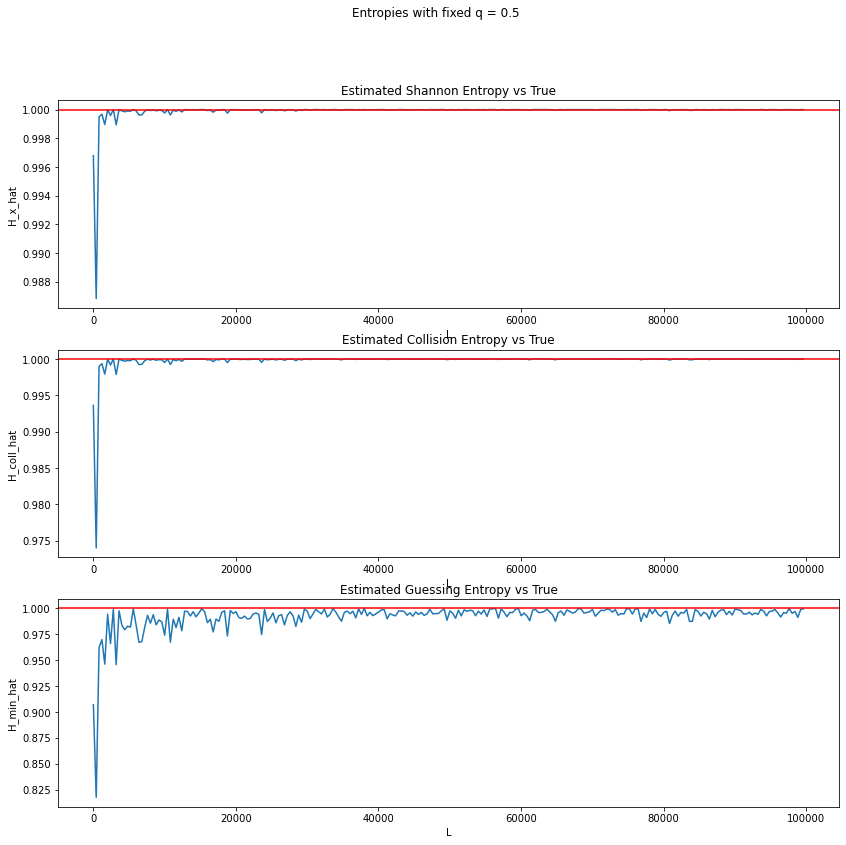

<Figure size 432x288 with 0 Axes>

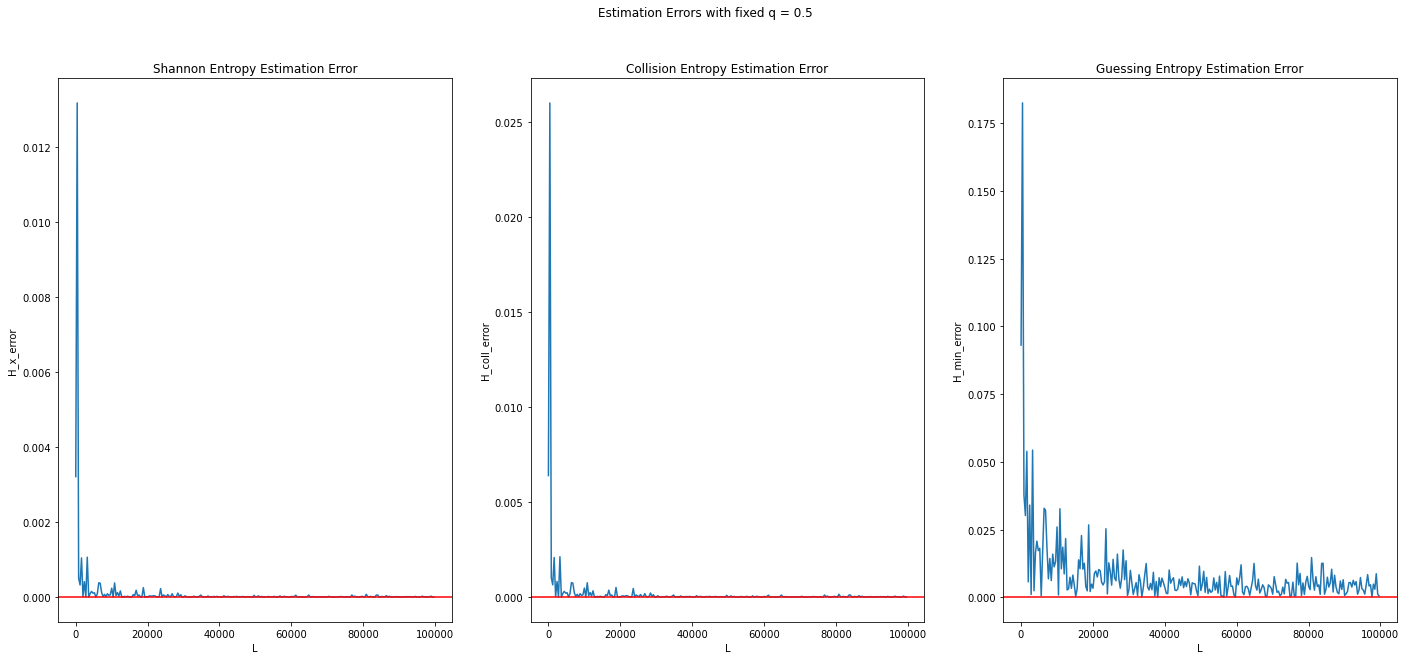

In [13]:
q = 0.5 # Fixed q = failure prob.
L_grid = np.arange(30, 100000, 400) # Grid of values for L

# EMPTY LISTS FOR PLOTS
## Entropies Estimates Absolute Values
H_x_hat_list = []
H_min_hat_list = []
H_coll_hat_list = []
## True Entropies Absolute Values
H_x_list = []
H_min_list = []
H_coll_list = []
## Estimation Errors
epsilon_H_x = []
epsilon_H_min = []
epsilon_H_coll = []

# "True" Entropies
H_x_true, H_coll_true, H_min_true = compute_true_binomial_entropies(q)

for L in L_grid:
    x_binary = generate_binomial(q, samples = L)
    
    # Entropy Estimates
    _, _, H_x_hat, H_coll_hat, H_min_hat = single_rv_estimates(x_binary, verbose=False)
    # "True" Entropies
    H_x_true, H_coll_true, H_min_true = compute_true_binomial_entropies(q)
    
    # Appends the values to the lists above:
    ## Entropies Estimates Absolute Values
    H_x_hat_list.append(H_x_hat)
    H_min_hat_list.append(H_min_hat)
    H_coll_hat_list.append(H_coll_hat)
    ## Estimation Errors
    epsilon_H_x.append(np.absolute(H_x_hat - H_x_true)/H_x_true)
    epsilon_H_min.append(np.absolute(H_min_hat - H_min_true)/H_min_true)
    epsilon_H_coll.append(np.absolute(H_coll_hat - H_coll_true)/H_coll_true)
    
# "ABSOLUTE" PLOTS
plt.figure()
fig, axs = plt.subplots(3)
fig.suptitle(f'Entropies with fixed q = {q}')

## Shannon Estimate
axs[0].plot(L_grid, H_x_hat_list)
axs[0].axhline(y=H_x_true, color='r')
axs[0].set(xlabel='L', ylabel='H_x_hat')
axs[0].set_title('Estimated Shannon Entropy vs True')
## Guessing Estimate
axs[1].plot(L_grid, H_coll_hat_list)
axs[1].axhline(y=H_coll_true, color='r')
axs[1].set(xlabel='L', ylabel='H_coll_hat')
axs[1].set_title('Estimated Collision Entropy vs True')
## Collision Estimate
axs[2].plot(L_grid, H_min_hat_list)
axs[2].axhline(y=H_min_true, color='r')
axs[2].set(xlabel='L', ylabel='H_min_hat')
axs[2].set_title('Estimated Guessing Entropy vs True')

fig.set_figheight(13)
fig.set_figwidth(14)

# ESTIMATION ERRORS PLOTS
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle(f'Estimation Errors with fixed q = {q}')
## Shannon
ax1.plot(L_grid, epsilon_H_x)
ax1.axhline(y=0, color='r')
ax1.set(xlabel='L', ylabel='H_x_error')
ax1.set_title('Shannon Entropy Estimation Error')
## Guessing
ax2.plot(L_grid, epsilon_H_coll)
ax2.axhline(y=0, color='r')
ax2.set(xlabel='L', ylabel='H_coll_error')
ax2.set_title('Collision Entropy Estimation Error')
## Collision
ax3.plot(L_grid, epsilon_H_min)
ax3.axhline(y=0, color='r')
ax3.set(xlabel='L', ylabel='H_min_error')
ax3.set_title('Guessing Entropy Estimation Error')

fig.set_figheight(10)
fig.set_figwidth(24)

## 2.3 Tests on Geometric Distribution

### 2.3.1 Varying $\lambda$

<Figure size 432x288 with 0 Axes>

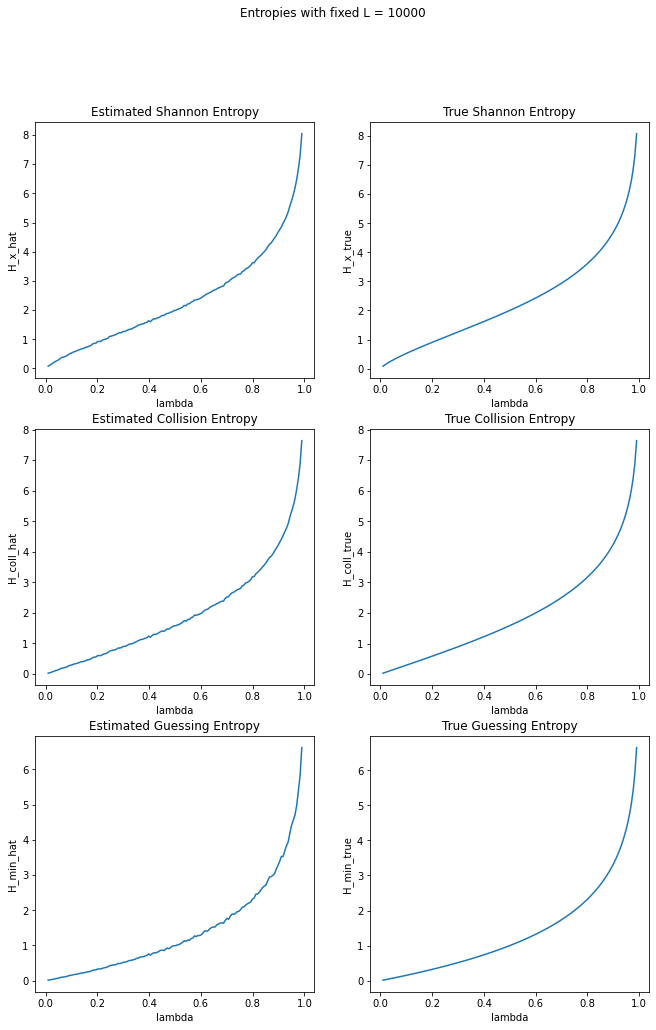

<Figure size 432x288 with 0 Axes>

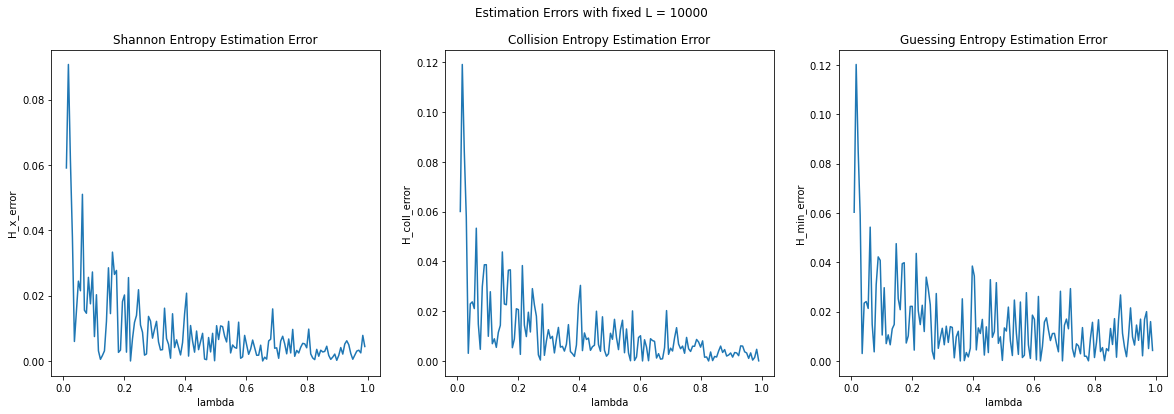

In [14]:
q_grid = np.linspace(0.01, 0.99, num=150) # Grid of values for the parameter q
L = 10000 # For now fixed L

# EMPTY LISTS FOR PLOTS
## Entropies Estimates Absolute Values
H_x_hat_list = []
H_min_hat_list = []
H_coll_hat_list = []
## True Entropies Absolute Values
H_x_list = []
H_min_list = []
H_coll_list = []
## Estimation Errors
epsilon_H_x = []
epsilon_H_min = []
epsilon_H_coll = []

for q in q_grid:
    x_geometric = generate_geometric(q, samples = L)
    
    # Entropy Estimates
    _, _, H_x_hat, H_coll_hat, H_min_hat = single_rv_estimates(x_geometric, verbose=False)
    # "True" Entropies
    H_x_true, H_coll_true, H_min_true = compute_true_geometric_entropies(q)
    
    # Appends the values to the lists above:
    ## Entropies Estimates Absolute Values
    H_x_hat_list.append(H_x_hat)
    H_min_hat_list.append(H_min_hat)
    H_coll_hat_list.append(H_coll_hat)
    ## True Entropies Absolute Values
    H_x_list.append(H_x_true)
    H_min_list.append(H_min_true)
    H_coll_list.append(H_coll_true)
    ## Estimation Errors
    epsilon_H_x.append(np.absolute(H_x_hat - H_x_true)/H_x_true)
    epsilon_H_min.append(np.absolute(H_min_hat - H_min_true)/H_min_true)
    epsilon_H_coll.append(np.absolute(H_coll_hat - H_coll_true)/H_coll_true)

# "ABSOLUTE" PLOTS
plt.figure()
fig, axs = plt.subplots(3,2)
fig.suptitle(f'Entropies with fixed L = {L}')
## Shannon Estimate
axs[0,0].plot(q_grid, H_x_hat_list)
axs[0,0].set(xlabel='lambda', ylabel='H_x_hat')
axs[0,0].set_title('Estimated Shannon Entropy')
## Shannon True
axs[0,1].plot(q_grid, H_x_list)
axs[0,1].set(xlabel='lambda', ylabel='H_x_true')
axs[0,1].set_title('True Shannon Entropy')
## Guessing Estimate
axs[1,0].plot(q_grid, H_coll_hat_list)
axs[1,0].set(xlabel='lambda', ylabel='H_coll_hat')
axs[1,0].set_title('Estimated Collision Entropy')
## Guessing True
axs[1,1].plot(q_grid, H_coll_list)
axs[1,1].set(xlabel='lambda', ylabel='H_coll_true')
axs[1,1].set_title('True Collision Entropy')
## Collision Estimate
axs[2,0].plot(q_grid, H_min_hat_list)
axs[2,0].set(xlabel='lambda', ylabel='H_min_hat')
axs[2,0].set_title('Estimated Guessing Entropy')
## Collision True
axs[2,1].plot(q_grid, H_min_list)
axs[2,1].set(xlabel='lambda', ylabel='H_min_true')
axs[2,1].set_title('True Guessing Entropy')

fig.set_figheight(16)
fig.set_figwidth(11)

# ESTIMATION ERRORS PLOTS
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle(f'Estimation Errors with fixed L = {L}')
## Shannon
ax1.plot(q_grid, epsilon_H_x)
ax1.set(xlabel='lambda', ylabel='H_x_error')
ax1.set_title('Shannon Entropy Estimation Error')
## Guessing
ax2.plot(q_grid, epsilon_H_coll)
ax2.set(xlabel='lambda', ylabel='H_coll_error')
ax2.set_title('Collision Entropy Estimation Error')
## Collision
ax3.plot(q_grid, epsilon_H_min)
ax3.set(xlabel='lambda', ylabel='H_min_error')
ax3.set_title('Guessing Entropy Estimation Error')

fig.set_figheight(6)
fig.set_figwidth(20)

**Considerations on the plots above:**

Note that if the Failure prob. $\lambda=0$ then:

$$H(x) = lim_{\lambda \to 0}\lambda(1 - \lambda) \log_2 \frac{1}{\lambda(1 - \lambda)} = 0$$

While:

$$H_{min}(x) = min_{a \in A_x} i_x(a) = lim_{\lambda \to 0} \log_2 \frac{1}{\lambda(1 - \lambda)} = +\infty$$

And the same limit holds for the Collision Entropy.

If $\lambda = 1$:

$$\lim_{\lambda \to 1} H(x) = \lim_{\lambda \to 1} \sum\limits_{k=1}^{+ \infty} (1 - \lambda) \log_2 \frac{1}{1-\lambda} = lim_{\lambda \to 1, k \to \infty} k(1 - \lambda) \log_2 \frac{1}{1-\lambda} = + \infty$$


### 2.3.2 Varying L

<Figure size 432x288 with 0 Axes>

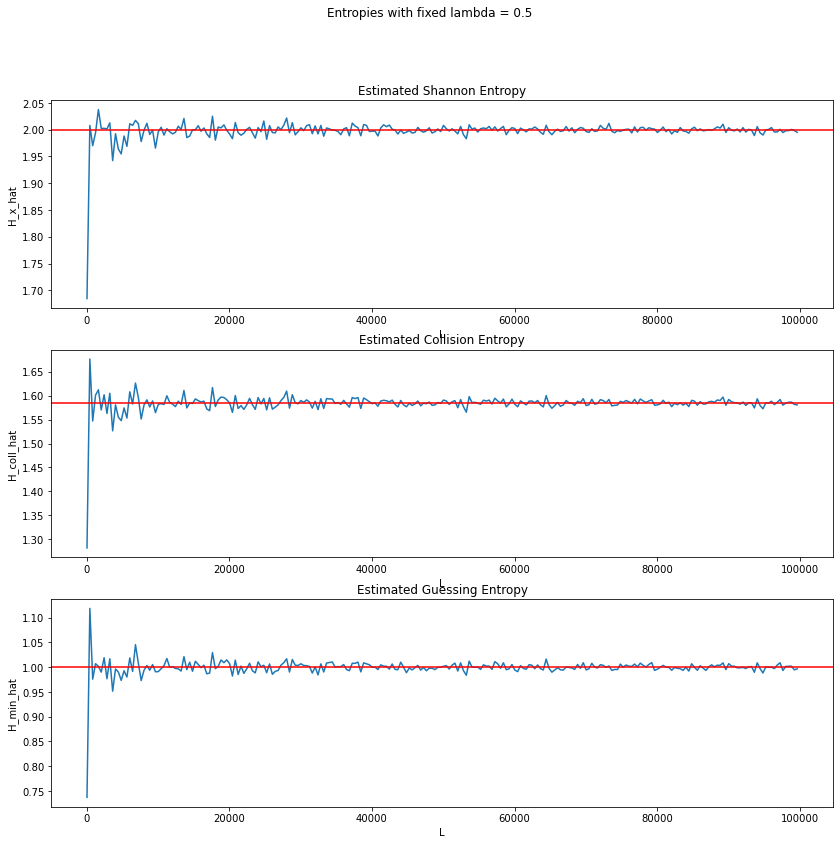

<Figure size 432x288 with 0 Axes>

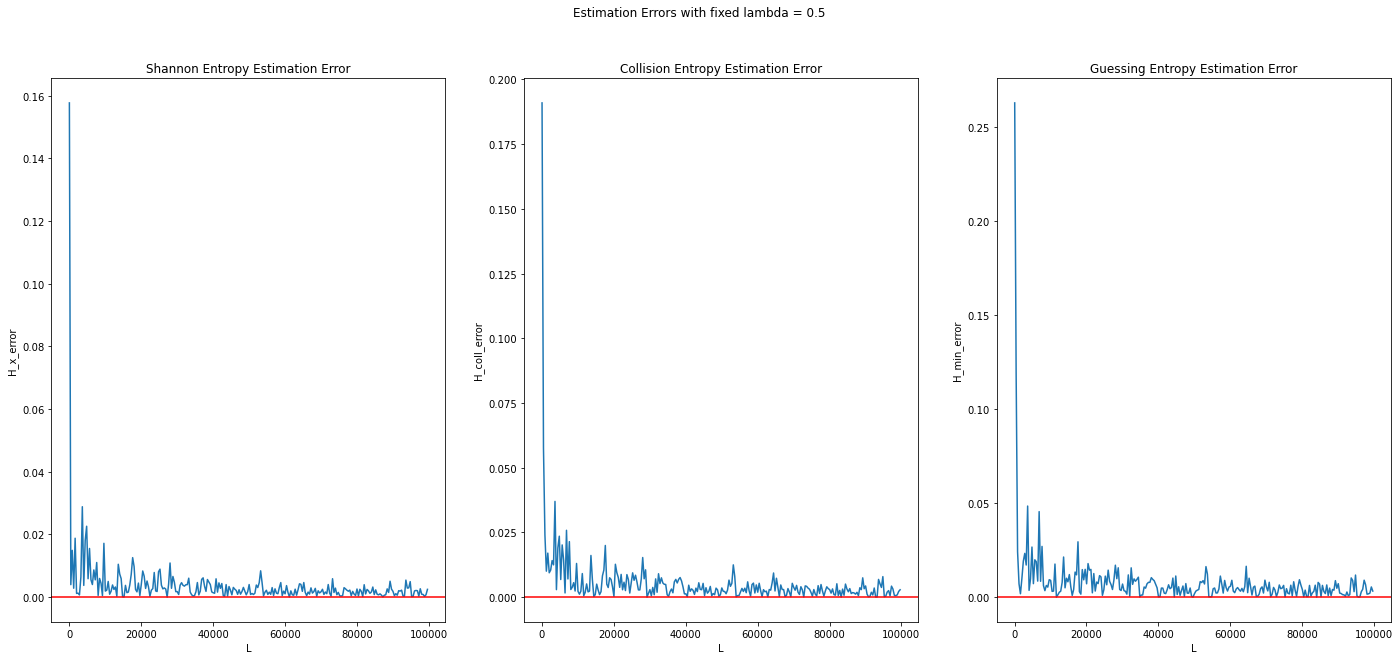

In [15]:
q = 0.5 # Fixed q = failure prob.
L_grid = np.arange(30, 100000, 400) # Grid of values for L

# EMPTY LISTS FOR PLOTS
## Entropies Estimates Absolute Values
H_x_hat_list = []
H_min_hat_list = []
H_coll_hat_list = []
## True Entropies Absolute Values
H_x_list = []
H_min_list = []
H_coll_list = []
## Estimation Errors
epsilon_H_x = []
epsilon_H_min = []
epsilon_H_coll = []

# "True" Entropies
H_x_true, H_coll_true, H_min_true = compute_true_geometric_entropies(q)

for L in L_grid:
    x_geometric = generate_geometric(q, samples = L)
    
    # Entropy Estimates
    _, _, H_x_hat, H_coll_hat, H_min_hat = single_rv_estimates(x_geometric, verbose=False)
    
    # Appends the values to the lists above:
    ## Entropies Estimates Absolute Values
    H_x_hat_list.append(H_x_hat)
    H_min_hat_list.append(H_min_hat)
    H_coll_hat_list.append(H_coll_hat)
    ## Estimation Errors
    epsilon_H_x.append(np.absolute(H_x_hat - H_x_true)/H_x_true)
    epsilon_H_min.append(np.absolute(H_min_hat - H_min_true)/H_min_true)
    epsilon_H_coll.append(np.absolute(H_coll_hat - H_coll_true)/H_coll_true)
    
# "ABSOLUTE" PLOTS
plt.figure()
fig, axs = plt.subplots(3)
fig.suptitle(f'Entropies with fixed lambda = {q}')

## Shannon Estimate
axs[0].plot(L_grid, H_x_hat_list)
axs[0].axhline(y=H_x_true, color='r')
axs[0].set(xlabel='L', ylabel='H_x_hat')
axs[0].set_title('Estimated Shannon Entropy')
## Guessing Estimate
axs[1].plot(L_grid, H_coll_hat_list)
axs[1].axhline(y=H_coll_true, color='r')
axs[1].set(xlabel='L', ylabel='H_coll_hat')
axs[1].set_title('Estimated Collision Entropy')
## Collision Estimate
axs[2].plot(L_grid, H_min_hat_list)
axs[2].axhline(y=H_min_true, color='r')
axs[2].set(xlabel='L', ylabel='H_min_hat')
axs[2].set_title('Estimated Guessing Entropy')

fig.set_figheight(13)
fig.set_figwidth(14)

# ESTIMATION ERRORS PLOTS
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle(f'Estimation Errors with fixed lambda = {q}')
## Shannon
ax1.plot(L_grid, epsilon_H_x)
ax1.axhline(y=0, color='r')
ax1.set(xlabel='L', ylabel='H_x_error')
ax1.set_title('Shannon Entropy Estimation Error')
## Guessing
ax2.plot(L_grid, epsilon_H_coll)
ax2.axhline(y=0, color='r')
ax2.set(xlabel='L', ylabel='H_coll_error')
ax2.set_title('Collision Entropy Estimation Error')
## Collision
ax3.plot(L_grid, epsilon_H_min)
ax3.axhline(y=0, color='r')
ax3.set(xlabel='L', ylabel='H_min_error')
ax3.set_title('Guessing Entropy Estimation Error')

fig.set_figheight(10)
fig.set_figwidth(24)

# TODO 3: Joint Sequences

In [16]:
# For Preliminary Tests
q, L = 0.2, 10000
x = generate_binomial(q,L)
y = generate_binomial(q,L)
print(compute_shannon_entropy(x))
print(compute_shannon_entropy(y))

0.7066720692756119
0.7168998285940985


In [17]:
def joint_pmd(x : np.ndarray, y : np.ndarray, return_A_pmd = False):
    A_x, p_x = extract_rv_alphabet_and_pmd(x)
    A_y, p_y = extract_rv_alphabet_and_pmd(y)
    p_xy = np.zeros((A_x.shape[0], A_y.shape[0]))
    
    for i in range(x.shape[0]):
        sample_x = x[i]
        sample_y = y[i]
        A_x_index = np.where(A_x == sample_x)[0].item()
        A_y_index = np.where(A_y == sample_y)[0].item()
#         print(A_x_index), print(A_y_index)
        p_xy[A_x_index, A_y_index] = p_xy[A_x_index, A_y_index] + 1
    p_xy = np.divide(p_xy, x.shape[0])
    #p_xy = np.outer(p_x, p_y) #### Funziona solo se indipendenti!!!
    
    if return_A_pmd == False:
        return p_xy
    else:
        return A_x, p_x, A_y, p_y, p_xy
    
def joint_entropy(x : np.ndarray, y : np.ndarray) -> float:
    p_xy = joint_pmd(x, y)
    H_xy = 0
    for p in p_xy.flatten():
        if p > 0:
            H_xy = H_xy + p * np.log2(1/p)
    return H_xy

def conditional_entropy(x : np.ndarray, y : np.ndarray) -> float:
    '''
    Function that computes H(x|y) = H(x,y) - H(y)
    '''
    H_xy = joint_entropy(x,y)
    H_y = compute_shannon_entropy(y)
#     print(f'The joint entropy is: {H_xy}')
#     print(f'The shannon entropy of y is: {H_y}')
    H_xy_conditional = H_xy - H_y
    return H_xy_conditional

def relative_entropy(x : np.ndarray, y : np.ndarray) -> float:
    A_x, p_x, A_y, p_y, p_xy = joint_pmd(x,y, return_A_pmd=True)
    if set(A_x) > set(A_y):
        print('The Relative Entropy is degenerate (+ infinite)')
        return inf
    else:
        D_pxy = 0
        for symbol_x, p_symbol_x in zip(A_x,p_x):
            y_index = np.where(A_y == symbol_x)
            p_symbol_y = p_y[y_index]
            if p_symbol_y.size != 0:
                p_symbol_y = p_symbol_y.item()
                D_pxy = D_pxy + p_symbol_x*np.log2(p_symbol_x/p_symbol_y)
        return D_pxy
    
def mutual_info(x : np.ndarray, y : np.ndarray) -> float:
    H_x = compute_shannon_entropy(x)
    H_y = compute_shannon_entropy(y)
    H_xy = joint_entropy(x,y)
    I_xy = H_x + H_y - H_xy
    return I_xy

def compute_joint_quantities(x, y) -> tuple:
    H_xy = joint_entropy(x,y)
    H_xy_conditional = conditional_entropy(x,y)
    D_pxy = relative_entropy(x,y)
    I_xy = mutual_info(x,y)
    return H_xy, H_xy_conditional, D_pxy, I_xy

print(joint_pmd(x,y,return_A_pmd=True))
print(joint_entropy(x,y))
print(conditional_entropy(x,y))
print(relative_entropy(x,y))
print(mutual_info(x,y))

(array([0, 1]), array([0.1925, 0.8075]), array([0, 1]), array([0.1975, 0.8025]), array([[0.0396, 0.1529],
       [0.1579, 0.6496]]))
1.423499258601408
0.7065994300073094
0.00011451562376077386
7.263926830258782e-05


# TODO 4: Test Joint Functions

## 4.1 Tests on Uniform Distribution

In [18]:
def compute_true_joint_uniform(M : int) -> tuple:
    H_x, _, _ = compute_true_uniform_entropies(1,M)
    # The following formule has been obtained by hand by computing every single probability for y
    H_y = (2/(3*M))*np.log2(3*M) + (4/(3*M))*np.log2((3*M)/2) + ((M-2)/M)*np.log2(M)
    H_xy = np.log2(3*M)
#     H_xy_conditional = (2/(3*M))*np.log2(6) + (2/(3*M))*np.log2(18) + ((M-4)/M)*np.log2(3)
    H_xy_conditional = (4/(3*M)) + np.log2(3) * ((M-2)/M)
    D_pxy = (2/M)*np.log2(3/2)
    I_xy = H_x + H_y - H_xy
    return H_xy, H_xy_conditional, D_pxy, I_xy

In [19]:
# # Setup for the simulations
# M = 2
# samples = 10000
# x = generate_uniform(1, M, samples = samples)
# z = generate_uniform(-1,1, samples = samples)
# print(np.unique(z, return_counts=True))
# y = x + z
# print(compute_shannon_entropy(y))

### 4.1.1 Varying M

<Figure size 432x288 with 0 Axes>

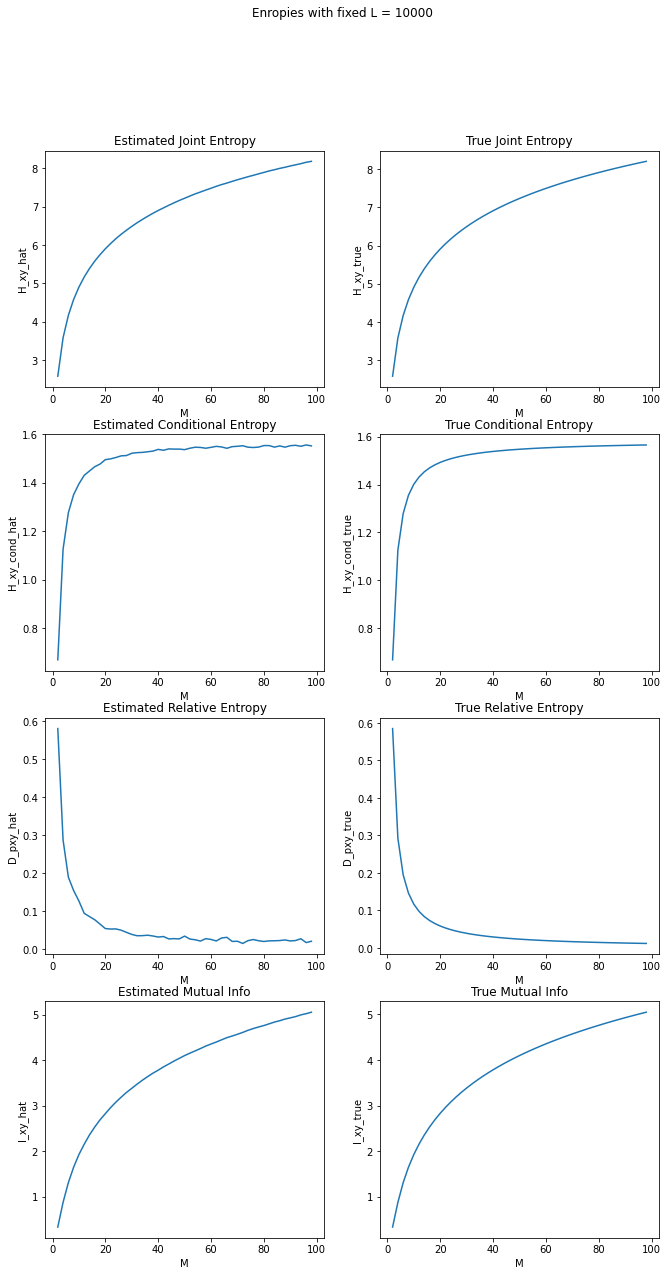

<Figure size 432x288 with 0 Axes>

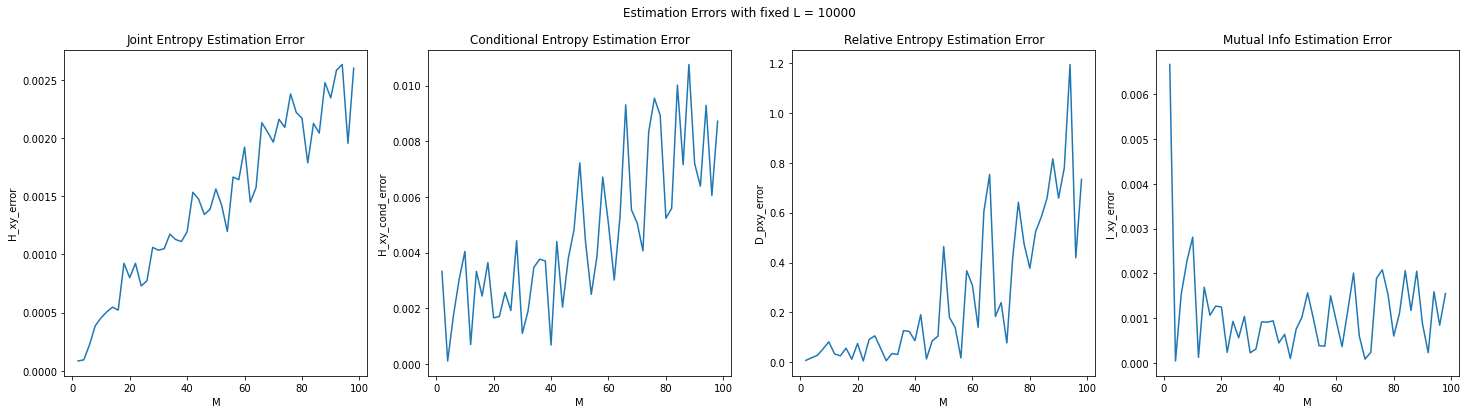

In [20]:
M_grid = np.arange(2, 100, 2) # Grid of values for the parameter M
L = 10000 # For now fixed L

# EMPTY LISTS FOR PLOTS
## Entropies Estimates Absolute Values
H_xy_hat_list= []
H_xy_cond_hat_list = []
D_pxy_hat_list = []
I_xy_hat_list = []
## True Entropies Absolute Values
H_xy_list = []
H_xy_cond_list = []
D_pxy_list = []
I_xy_list = []
## Estimation Errors
epsilon_H_xy = []
epsilon_H_xy_cond = []
epsilon_D_pxy = []
epsilon_I_xy = []

for M in M_grid:
    x_uniform = generate_uniform(1, M, samples = L)
    z = generate_uniform(-1,1, samples = L)
    y = x_uniform + z
    
    # Entropy Estimates
    H_xy_hat, H_xy_cond_hat, D_pxy_hat, I_xy_hat = compute_joint_quantities(x_uniform, y)
    # "True" Entropies
    H_xy, H_xy_cond, D_pxy, I_xy = compute_true_joint_uniform(M)
    D_pxy = float(D_pxy)
    
    # Appends the values to the lists above:
    ## Entropies Estimates Absolute Values
    H_xy_hat_list.append(H_xy_hat)
    H_xy_cond_hat_list.append(H_xy_cond_hat)
    D_pxy_hat_list.append(D_pxy_hat)
    I_xy_hat_list.append(I_xy_hat)
    ## True Entropies Absolute Values
    H_xy_list.append(H_xy)
    H_xy_cond_list.append(H_xy_cond)
    D_pxy_list.append(D_pxy)
    I_xy_list.append(I_xy)
    ## Estimation Errors
    epsilon_H_xy.append(np.absolute(H_xy_hat - H_xy)/H_xy)
    epsilon_H_xy_cond.append(np.absolute(H_xy_cond_hat - H_xy_cond)/H_xy_cond)
    epsilon_D_pxy.append(np.absolute(D_pxy_hat - D_pxy)/D_pxy)
    epsilon_I_xy.append(np.absolute(I_xy_hat - I_xy)/I_xy)

# "ABSOLUTE" PLOTS
plt.figure()
fig, axs = plt.subplots(4,2)
fig.suptitle(f'Enropies with fixed L = {L}')
## Joint Entropy
axs[0,0].plot(M_grid, H_xy_hat_list)
axs[0,0].set(xlabel='M', ylabel='H_xy_hat')
axs[0,0].set_title('Estimated Joint Entropy')
## True Joint Entropy
axs[0,1].plot(M_grid, H_xy_list)
axs[0,1].set(xlabel='M', ylabel='H_xy_true')
axs[0,1].set_title('True Joint Entropy')
## Conditional Estimate
axs[1,0].plot(M_grid, H_xy_cond_hat_list)
axs[1,0].set(xlabel='M', ylabel='H_xy_cond_hat')
axs[1,0].set_title('Estimated Conditional Entropy')
## Conditional True
axs[1,1].plot(M_grid, H_xy_cond_list)
axs[1,1].set(xlabel='M', ylabel='H_xy_cond_true')
axs[1,1].set_title('True Conditional Entropy')
## Relative Estimate
axs[2,0].plot(M_grid, D_pxy_hat_list)
axs[2,0].set(xlabel='M', ylabel='D_pxy_hat')
axs[2,0].set_title('Estimated Relative Entropy')
## Relative True
axs[2,1].plot(M_grid, D_pxy_list)
axs[2,1].set(xlabel='M', ylabel='D_pxy_true')
axs[2,1].set_title('True Relative Entropy')
## Estimated mutual info
axs[3,0].plot(M_grid, I_xy_hat_list)
axs[3,0].set(xlabel='M', ylabel='I_xy_hat')
axs[3,0].set_title('Estimated Mutual Info')
## True Mutual info
axs[3,1].plot(M_grid, I_xy_list)
axs[3,1].set(xlabel='M', ylabel='I_xy_true')
axs[3,1].set_title('True Mutual Info')

fig.set_figheight(20)
fig.set_figwidth(11)

# ESTIMATION ERRORS PLOTS
plt.figure()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
fig.suptitle(f'Estimation Errors with fixed L = {L}')
## Joiint Ent
ax1.plot(M_grid, epsilon_H_xy)
ax1.set(xlabel='M', ylabel='H_xy_error')
ax1.set_title('Joint Entropy Estimation Error')
## Cond. Ent.
ax2.plot(M_grid, epsilon_H_xy_cond)
ax2.set(xlabel='M', ylabel='H_xy_cond_error')
ax2.set_title('Conditional Entropy Estimation Error')
## Relative
ax3.plot(M_grid, epsilon_D_pxy)
ax3.set(xlabel='M', ylabel='D_pxy_error')
ax3.set_title('Relative Entropy Estimation Error')
## Mutual Info
ax4.plot(M_grid, epsilon_I_xy)
ax4.set(xlabel='M', ylabel='I_xy_error')
ax4.set_title('Mutual Info Estimation Error')

fig.set_figheight(6)
fig.set_figwidth(25)

### Considerations on Uniform
+ The joint must be (and is) similar to a uniform distribution with a corrective term:
$$H(x,y) = \underbrace{H(x|y)}_{\text{Decreasing of M}} + \underbrace{H(y)}_{\text{almost a uniform}}$$

### 4.1.2 Varying L

<Figure size 432x288 with 0 Axes>

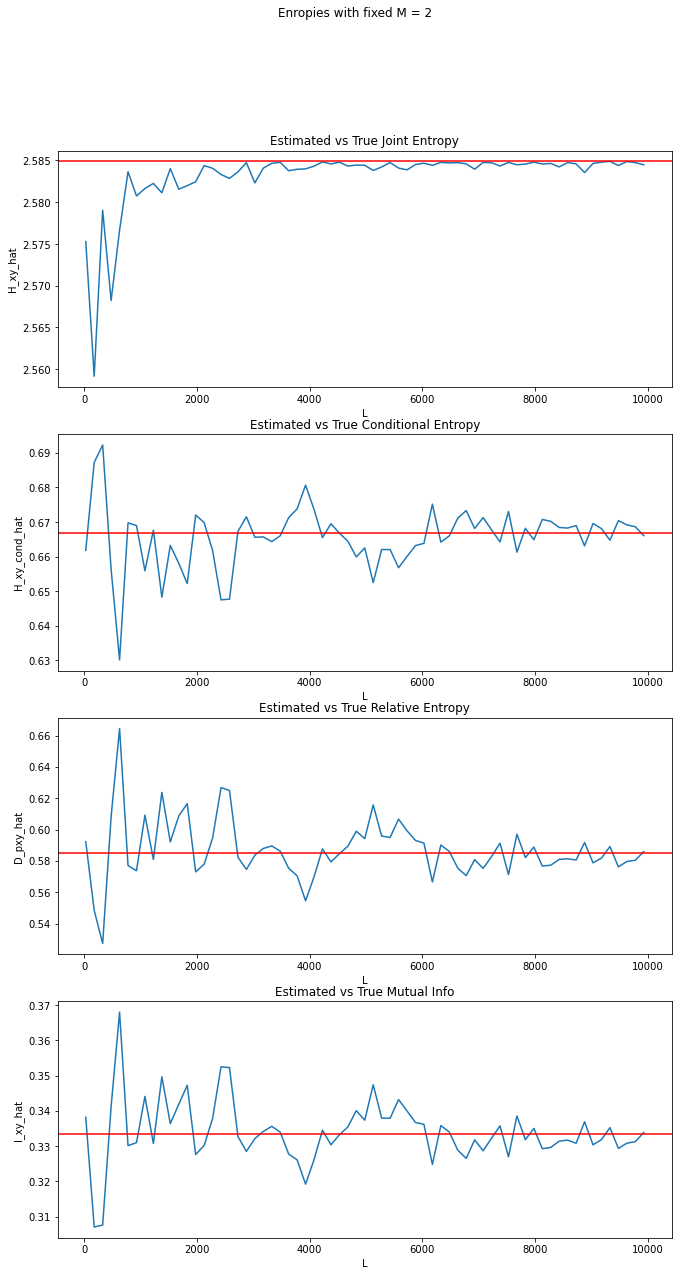

<Figure size 432x288 with 0 Axes>

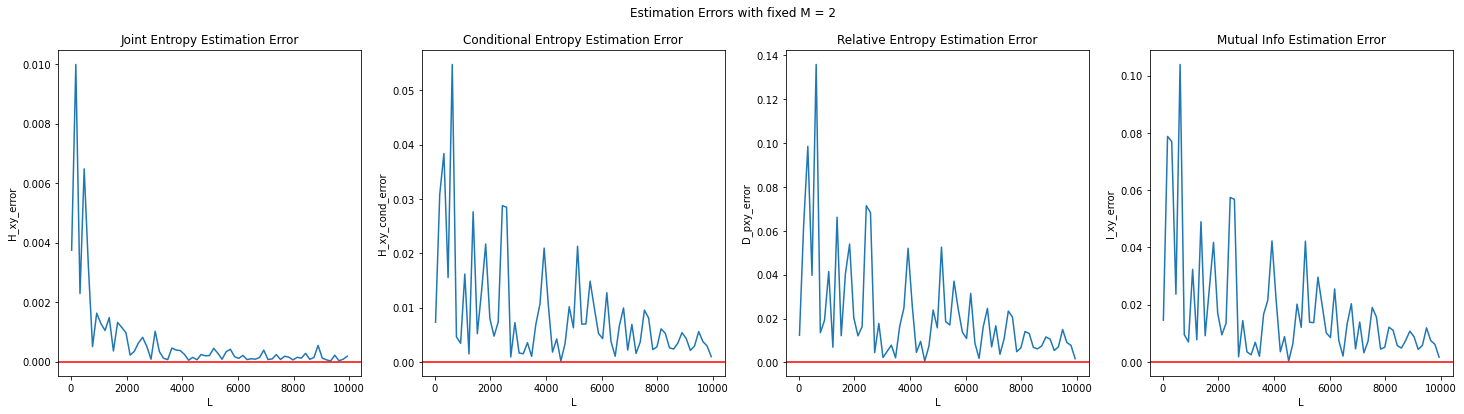

In [21]:
M = 2 # Fixed M
L_grid = np.arange(30,10000,150) # Grid of values for L

# EMPTY LISTS FOR PLOTS
## Entropies Estimates Absolute Values
H_xy_hat_list= []
H_xy_cond_hat_list = []
D_pxy_hat_list = []
I_xy_hat_list = []
## True Entropies Absolute Values
H_xy, H_xy_cond, D_pxy, I_xy = compute_true_joint_uniform(M)
## Estimation Errors
epsilon_H_xy = []
epsilon_H_xy_cond = []
epsilon_D_pxy = []
epsilon_I_xy = []

for L in L_grid:
    x_uniform = generate_uniform(1, M, samples = L)
    z = generate_uniform(-1,1, samples = L)
    y = x_uniform + z
    
    # Entropy Estimates
    H_xy_hat, H_xy_cond_hat, D_pxy_hat, I_xy_hat = compute_joint_quantities(x_uniform, y)
    
    # Appends the values to the lists above:
    ## Entropies Estimates Absolute Values
    H_xy_hat_list.append(H_xy_hat)
    H_xy_cond_hat_list.append(H_xy_cond_hat)
    D_pxy_hat_list.append(D_pxy_hat)
    I_xy_hat_list.append(I_xy_hat)
    ## Estimation Errors
    epsilon_H_xy.append(np.absolute(H_xy_hat - H_xy)/H_xy)
    epsilon_H_xy_cond.append(np.absolute(H_xy_cond_hat - H_xy_cond)/H_xy_cond)
    epsilon_D_pxy.append(np.absolute(D_pxy_hat - D_pxy)/D_pxy)
    epsilon_I_xy.append(np.absolute(I_xy_hat - I_xy)/I_xy)

# "ABSOLUTE" PLOTS
plt.figure()
fig, axs = plt.subplots(4)
fig.suptitle(f'Enropies with fixed M = {M}')
## Joint Entropy
axs[0].plot(L_grid, H_xy_hat_list)
axs[0].axhline(y=H_xy, color='r')
axs[0].set(xlabel='L', ylabel='H_xy_hat')
axs[0].set_title('Estimated vs True Joint Entropy')
## Conditional Estimate
axs[1].plot(L_grid, H_xy_cond_hat_list)
axs[1].axhline(y=H_xy_cond, color='r')
axs[1].set(xlabel='L', ylabel='H_xy_cond_hat')
axs[1].set_title('Estimated vs True Conditional Entropy')
## Relative Estimate
axs[2].plot(L_grid, D_pxy_hat_list)
axs[2].axhline(y=D_pxy, color='r')
axs[2].set(xlabel='L', ylabel='D_pxy_hat')
axs[2].set_title('Estimated vs True Relative Entropy')
## Estimated mutual info
axs[3].plot(L_grid, I_xy_hat_list)
axs[3].axhline(y=I_xy, color='r')
axs[3].set(xlabel='L', ylabel='I_xy_hat')
axs[3].set_title('Estimated vs True Mutual Info')

fig.set_figheight(20)
fig.set_figwidth(11)

# ESTIMATION ERRORS PLOTS
plt.figure()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
fig.suptitle(f'Estimation Errors with fixed M = {M}')
## Joiint Ent
ax1.plot(L_grid, epsilon_H_xy)
ax1.axhline(y=0, color='r')
ax1.set(xlabel='L', ylabel='H_xy_error')
ax1.set_title('Joint Entropy Estimation Error')
## Cond. Ent.
ax2.plot(L_grid, epsilon_H_xy_cond)
ax2.axhline(y=0, color='r')
ax2.set(xlabel='L', ylabel='H_xy_cond_error')
ax2.set_title('Conditional Entropy Estimation Error')
## Relative
ax3.plot(L_grid, epsilon_D_pxy)
ax3.axhline(y=0, color='r')
ax3.set(xlabel='L', ylabel='D_pxy_error')
ax3.set_title('Relative Entropy Estimation Error')
## Mutual Info
ax4.plot(L_grid, epsilon_I_xy)
ax4.axhline(y=0, color='r')
ax4.set(xlabel='L', ylabel='I_xy_error')
ax4.set_title('Mutual Info Estimation Error')

fig.set_figheight(6)
fig.set_figwidth(25)

## 4.1 Tests on Geometric distribution

In [22]:
def true_joint_H_geometric(lambda_x, lambda_y): 
#     lx, ly = lambda_x, lambda_y
#     sx, sy = 1-lx, 1-ly #succes probs.
#     H_xy = sx*sy*(np.log2(1/(sx*sy))*(1/sx)*(1/sy) + np.log2(1/lx)*(lx/sx**2)*(1/sy) + np.log2(1/ly)*(1/sx)*(ly/(sy)**2)    )
    
    #since indep. H(x,y) = H(x) + H(y)
    H_x,_,_ = compute_true_geometric_entropies(lambda_x)
    H_y,_,_ = compute_true_geometric_entropies(lambda_y)
    H_xy = H_x + H_y
    return H_xy
    
def true_cond_H_geometric(lambda_x, lambda_y):
    '''
    x and y are indep. and hence H(x|y) = H(x)
    '''
    H_x, _, _ = compute_true_geometric_entropies(lambda_x)
    return(H_x)

def true_D_pxy_geometric(lambda_x, lambda_y):
    '''
    This is not an approximation
    '''
    sx = 1 - lambda_x # P(success) for x
    sy = 1 - lambda_y # P(success) for y
    D_pxy = sx*(np.log2(sx/sy)*(1/sx) + np.log2(lambda_x)*(lambda_x/(sx**2)) - np.log2(lambda_y)*(lambda_x/(sx**2)))
    return D_pxy
    
def true_I_xy_geometric(lambda_x, lambda_y):
#     H_x,_,_ = compute_true_geometric_entropies(lambda_x)
#     H_y,_,_ = compute_true_geometric_entropies(lambda_y)
#     H_xy = true_joint_H_geometric(lambda_x, lambda_y)
#     I_xy = H_x + H_y - H_xy

    # Simply 0 since independent in our case
    return 0
    
print(true_joint_H_geometric(0.5, 0.5))
# print(true_cond_H_geometric(0.01, 0.01))
# print(true_D_pxy_geometric(0.01,0.01))
# print(true_I_xy_geometric(0.01,0.01))

4.0


In [23]:
def compute_true_joint_geometric(lambda_x, lambda_y) -> tuple:
    H_xy = true_joint_H_geometric(lambda_x, lambda_y) 
    H_xy_conditional = true_cond_H_geometric(lambda_x, lambda_y) 
    D_pxy = true_D_pxy_geometric(lambda_x, lambda_y) 
    I_xy = true_I_xy_geometric(lambda_x, lambda_y) 
    return H_xy, H_xy_conditional, D_pxy, I_xy

### 4.2.1 Varying $\lambda_x$ and $\lambda_y$

The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)


<Figure size 432x288 with 0 Axes>

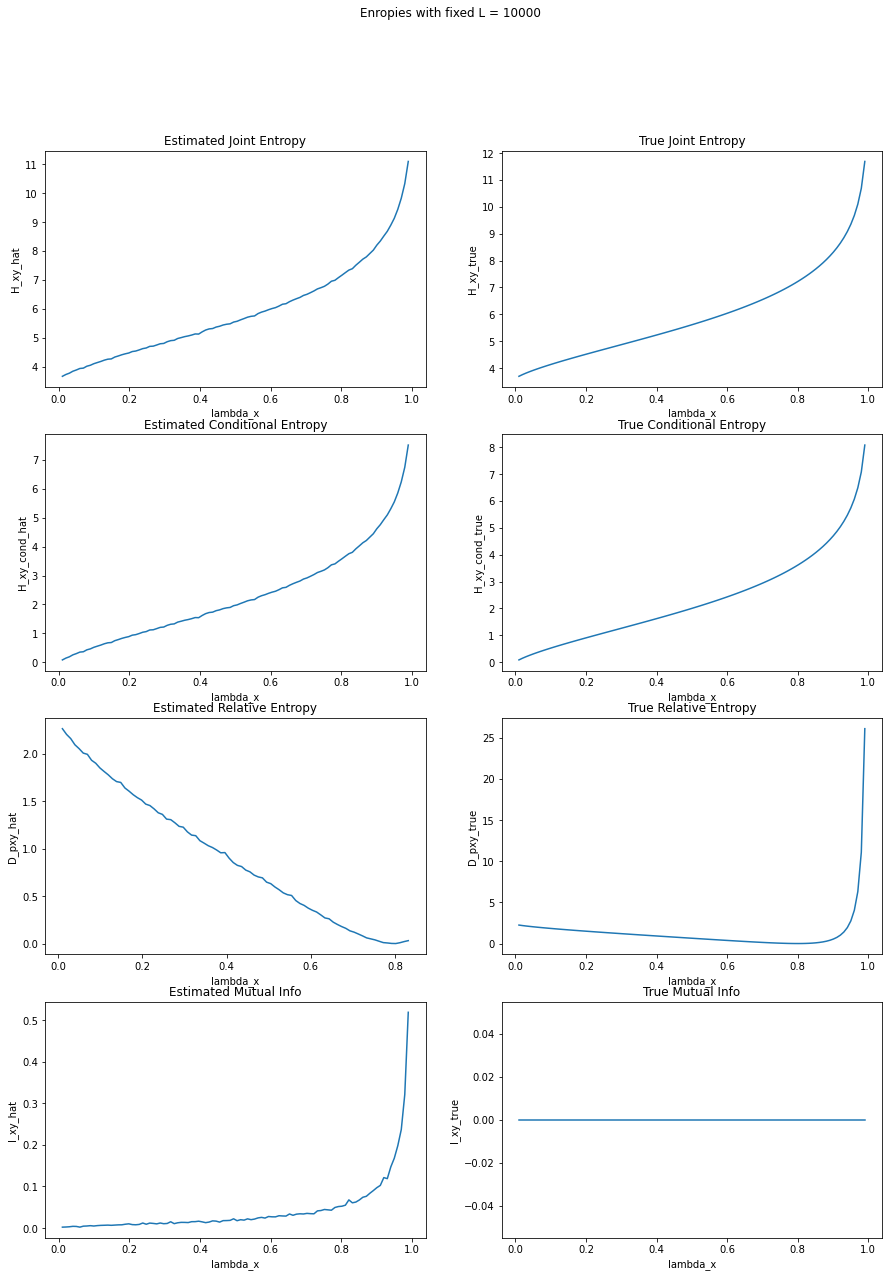

<Figure size 432x288 with 0 Axes>

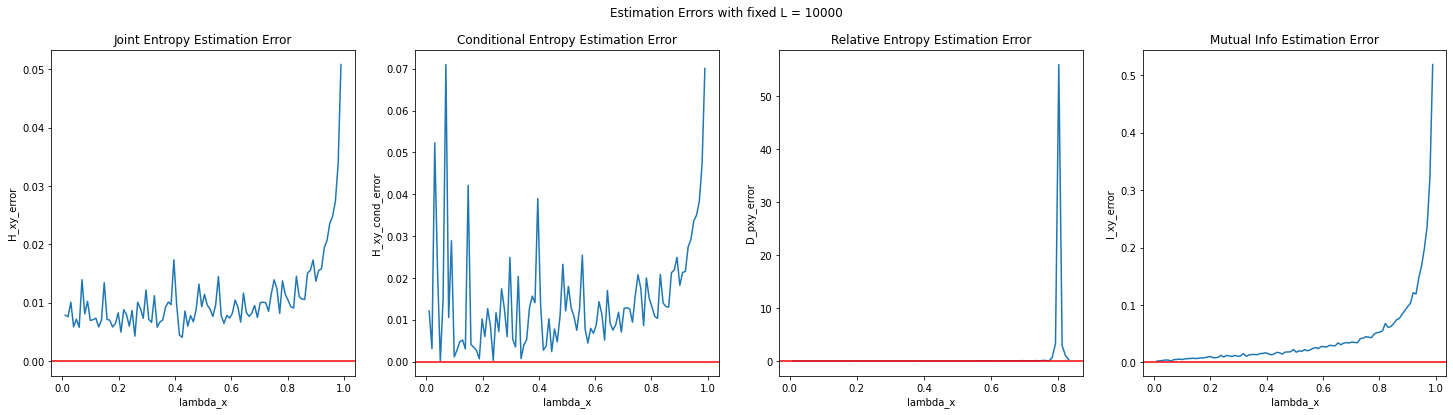

In [24]:
L = 10000
lambda_x_grid = np.linspace(0.01, 0.99, 100) # Grid of values for the parameter lambda_x
lambda_y = 0.8 # fixed for now
y_geom = generate_geometric(lambda_y, L)

# EMPTY LISTS FOR PLOTS
## Entropies Estimates Absolute Values
H_xy_hat_list= []
H_xy_cond_hat_list = []
D_pxy_hat_list = []
I_xy_hat_list = []
## True Entropies Absolute Values
H_xy_list = []
H_xy_cond_list = []
D_pxy_list = []
I_xy_list = []
## Estimation Errors
epsilon_H_xy = []
epsilon_H_xy_cond = []
epsilon_D_pxy = []
epsilon_I_xy = []

for lx in lambda_x_grid:
    x_geom = generate_geometric(lx, samples = L)
    
    # Entropy Estimates
    H_xy_hat, H_xy_cond_hat, D_pxy_hat, I_xy_hat = compute_joint_quantities(x_geom, y_geom)
    # "True" Entropies
    H_xy, H_xy_cond, D_pxy, I_xy = compute_true_joint_geometric(lx,lambda_y)
    D_pxy = float(D_pxy)
    
    # Appends the values to the lists above:
    ## Entropies Estimates Absolute Values
    H_xy_hat_list.append(H_xy_hat)
    H_xy_cond_hat_list.append(H_xy_cond_hat)
    D_pxy_hat_list.append(D_pxy_hat)
    I_xy_hat_list.append(I_xy_hat)
    ## True Entropies Absolute Values
    H_xy_list.append(H_xy)
    H_xy_cond_list.append(H_xy_cond)
    D_pxy_list.append(D_pxy)
    I_xy_list.append(I_xy)
    ## Estimation Errors
    epsilon_H_xy.append(np.absolute(H_xy_hat - H_xy)/H_xy)
    epsilon_H_xy_cond.append(np.absolute(H_xy_cond_hat - H_xy_cond)/H_xy_cond)
    epsilon_D_pxy.append(np.absolute(D_pxy_hat - D_pxy)/D_pxy)
    epsilon_I_xy.append(np.absolute(I_xy_hat - I_xy))#modified since I_xy = 0

# "ABSOLUTE" PLOTS
plt.figure()
fig, axs = plt.subplots(4,2)
fig.suptitle(f'Enropies with fixed L = {L}')
## Joint Entropy
axs[0,0].plot(lambda_x_grid, H_xy_hat_list)
axs[0,0].set(xlabel='lambda_x', ylabel='H_xy_hat')
axs[0,0].set_title('Estimated Joint Entropy')
## True Joint Entropy
axs[0,1].plot(lambda_x_grid, H_xy_list)
axs[0,1].set(xlabel='lambda_x', ylabel='H_xy_true')
axs[0,1].set_title('True Joint Entropy')
## Conditional Estimate
axs[1,0].plot(lambda_x_grid, H_xy_cond_hat_list)
axs[1,0].set(xlabel='lambda_x', ylabel='H_xy_cond_hat')
axs[1,0].set_title('Estimated Conditional Entropy')
## Conditional True
axs[1,1].plot(lambda_x_grid, H_xy_cond_list)
axs[1,1].set(xlabel='lambda_x', ylabel='H_xy_cond_true')
axs[1,1].set_title('True Conditional Entropy')
## Relative Estimate
axs[2,0].plot(lambda_x_grid, D_pxy_hat_list)
axs[2,0].set(xlabel='lambda_x', ylabel='D_pxy_hat')
axs[2,0].set_title('Estimated Relative Entropy')
## Relative True
axs[2,1].plot(lambda_x_grid, D_pxy_list)
axs[2,1].set(xlabel='lambda_x', ylabel='D_pxy_true')
axs[2,1].set_title('True Relative Entropy')
## Estimated mutual info
axs[3,0].plot(lambda_x_grid, I_xy_hat_list)
axs[3,0].set(xlabel='lambda_x', ylabel='I_xy_hat')
axs[3,0].set_title('Estimated Mutual Info')
## True Mutual info
axs[3,1].plot(lambda_x_grid, I_xy_list)
axs[3,1].set(xlabel='lambda_x', ylabel='I_xy_true')
axs[3,1].set_title('True Mutual Info')

fig.set_figheight(20)
fig.set_figwidth(15)

# ESTIMATION ERRORS PLOTS
plt.figure()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
fig.suptitle(f'Estimation Errors with fixed L = {L}')
## Joiint Ent
ax1.plot(lambda_x_grid, epsilon_H_xy)
ax1.axhline(y=0, color='r')
ax1.set(xlabel='lambda_x', ylabel='H_xy_error')
ax1.set_title('Joint Entropy Estimation Error')
## Cond. Ent.
ax2.plot(lambda_x_grid, epsilon_H_xy_cond)
ax2.axhline(y=0, color='r')
ax2.set(xlabel='lambda_x', ylabel='H_xy_cond_error')
ax2.set_title('Conditional Entropy Estimation Error')
## Relative
ax3.plot(lambda_x_grid, epsilon_D_pxy)
ax3.axhline(y=0, color='r')
ax3.set(xlabel='lambda_x', ylabel='D_pxy_error')
ax3.set_title('Relative Entropy Estimation Error')
## Mutual Info
ax4.plot(lambda_x_grid, epsilon_I_xy)
ax4.axhline(y=0, color='r')
ax4.set(xlabel='lambda_x', ylabel='I_xy_error')
ax4.set_title('Mutual Info Estimation Error')

fig.set_figheight(6)
fig.set_figwidth(25)

In [25]:
L = 1000
lambda_x_grid = np.linspace(0.01, 0.99, 50) # Grid of values for the parameter lambda_x
lambda_y_grid = np.linspace(0.01, 0.99, 50)

len_x = lambda_x_grid.shape[0]
len_y = lambda_y_grid.shape[0]
# EMPTY LISTS FOR PLOTS
## Entropies Estimates Absolute Values
H_xy_hat_list= np.zeros((len_x,len_y))
H_xy_cond_hat_list = np.zeros((len_x,len_y))
D_pxy_hat_list = np.zeros((len_x,len_y))
I_xy_hat_list = np.zeros((len_x,len_y))
## True Entropies Absolute Values
H_xy_list = np.zeros((len_x,len_y))
H_xy_cond_list = np.zeros((len_x,len_y))
D_pxy_list = np.zeros((len_x,len_y))
I_xy_list = np.zeros((len_x,len_y))
## Estimation Errors
epsilon_H_xy = np.zeros((len_x,len_y))
epsilon_H_xy_cond = np.zeros((len_x,len_y))
epsilon_D_pxy = np.zeros((len_x,len_y))
epsilon_I_xy = np.zeros((len_x,len_y))

for lx in range(len_x):
    for ly in range(len_y):
        x_geom = generate_geometric(lambda_x_grid[lx], samples = L)
        y_geom = generate_geometric(lambda_y_grid[ly], samples=L)
    
        # Entropy Estimates
        H_xy_hat, H_xy_cond_hat, D_pxy_hat, I_xy_hat = compute_joint_quantities(x_geom, y_geom)
        # "True" Entropies
        H_xy, H_xy_cond, D_pxy, I_xy = compute_true_joint_geometric(lambda_x_grid[lx],lambda_y_grid[ly])
        D_pxy = float(D_pxy)

        # Appends the values to the lists above:
        ## Entropies Estimates Absolute Values
        H_xy_hat_list[lx,ly] = H_xy_hat
        H_xy_cond_hat_list[lx,ly] =H_xy_cond_hat
        D_pxy_hat_list[lx,ly]= D_pxy_hat
        I_xy_hat_list[lx,ly]= I_xy_hat
        ## True Entropies Absolute Values
        H_xy_list[lx,ly] = H_xy
        H_xy_cond_list[lx,ly]= H_xy_cond
        D_pxy_list[lx,ly]= D_pxy
        I_xy_list[lx,ly]= I_xy
        ## Estimation Errors
        epsilon_H_xy[lx,ly]= np.absolute(H_xy_hat - H_xy)/H_xy
        epsilon_H_xy_cond[lx,ly]= np.absolute(H_xy_cond_hat - H_xy_cond)/H_xy_cond
        epsilon_D_pxy[lx,ly]= np.absolute(D_pxy_hat - D_pxy)/D_pxy
        epsilon_I_xy[lx,ly]= np.absolute(I_xy_hat - I_xy)

/tmp/ipykernel_11594/587870740.py:49: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon_D_pxy[lx,ly]= np.absolute(D_pxy_hat - D_pxy)/D_pxy


The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ in

The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ in

The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ in

The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ in

The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ in

The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ in

The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ infinite)
The Relative Entropy is degenerate (+ in

In [26]:
###### 3D PLOTS

# XX, YY = np.meshgrid(lambda_x_grid, lambda_y_grid)

# fig1 = plt.figure()
# ax = plt.axes(projection="3d")
# ax.plot_wireframe(XX, YY, epsilon_H_xy, color='green')
# plt.show()

# fig2 = plt.figure()
# ax = plt.axes(projection="3d")
# ax.plot_wireframe(XX, YY, epsilon_H_xy_cond, color='green')
# plt.show()

# fig3 = plt.figure()
# ax = plt.axes(projection="3d")
# ax.plot_wireframe(XX, YY, epsilon_D_pxy, color='green')
# plt.show()

# fig3 = plt.figure()
# ax = plt.axes(projection="3d")
# ax.plot_wireframe(XX, YY, epsilon_I_xy, color='green')
# plt.show()

## 4.2.1 Varying L

<Figure size 432x288 with 0 Axes>

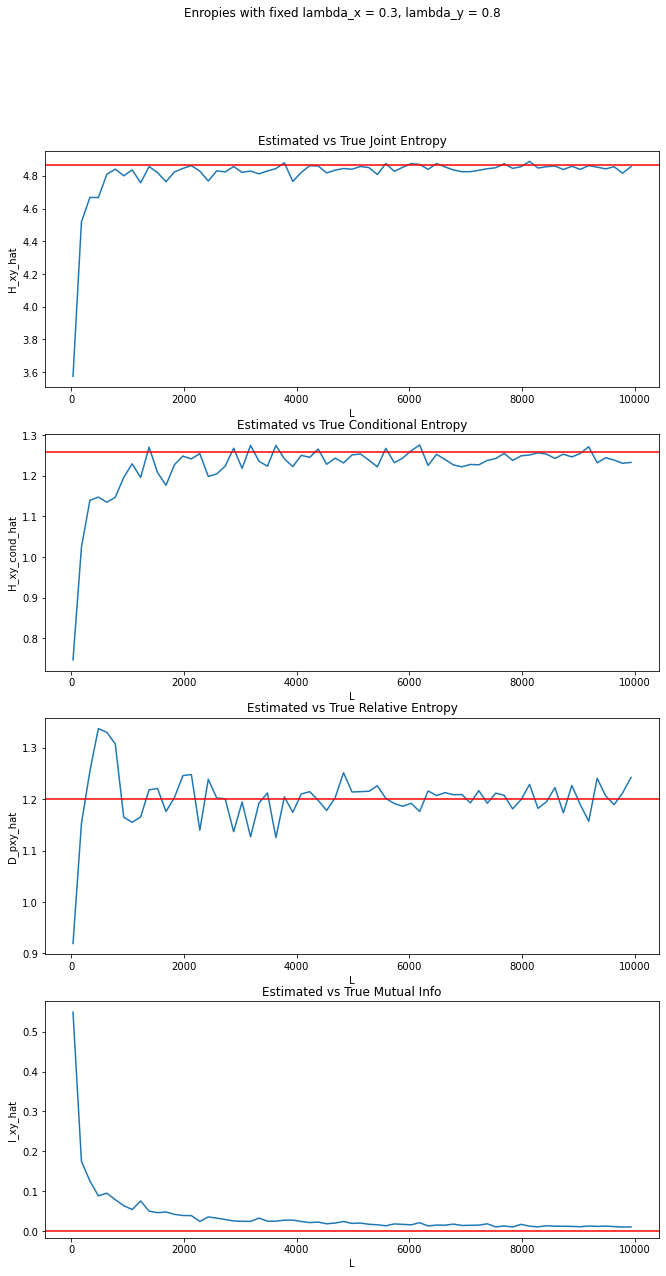

<Figure size 432x288 with 0 Axes>

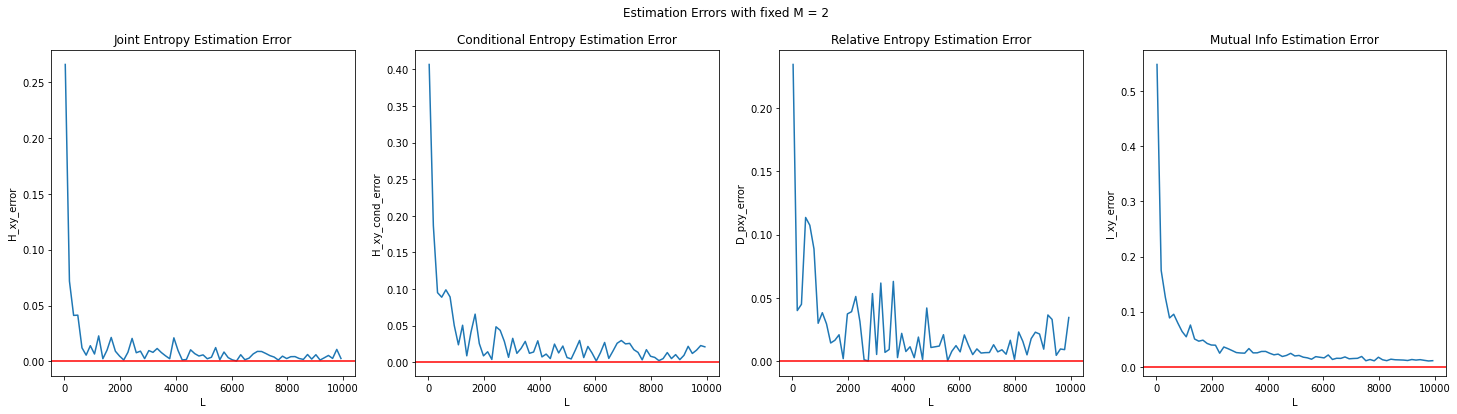

In [27]:
lambda_x = 0.3
lambda_y = 0.8
L_grid = np.arange(30,10000,150) # Grid of values for L

# EMPTY LISTS FOR PLOTS
## Entropies Estimates Absolute Values
H_xy_hat_list= []
H_xy_cond_hat_list = []
D_pxy_hat_list = []
I_xy_hat_list = []
## True Entropies Absolute Values
H_xy, H_xy_cond, D_pxy, I_xy = compute_true_joint_geometric(lambda_x,lambda_y)
## Estimation Errors
epsilon_H_xy = []
epsilon_H_xy_cond = []
epsilon_D_pxy = []
epsilon_I_xy = []

for L in L_grid:
    x_geom = generate_geometric(lambda_x, samples = L)
    y_geom = generate_geometric(lambda_y, samples = L)
    
    # Entropy Estimates
    H_xy_hat, H_xy_cond_hat, D_pxy_hat, I_xy_hat = compute_joint_quantities(x_geom, y_geom)
    
    # Appends the values to the lists above:
    ## Entropies Estimates Absolute Values
    H_xy_hat_list.append(H_xy_hat)
    H_xy_cond_hat_list.append(H_xy_cond_hat)
    D_pxy_hat_list.append(D_pxy_hat)
    I_xy_hat_list.append(I_xy_hat)
    ## Estimation Errors
    epsilon_H_xy.append(np.absolute(H_xy_hat - H_xy)/H_xy)
    epsilon_H_xy_cond.append(np.absolute(H_xy_cond_hat - H_xy_cond)/H_xy_cond)
    epsilon_D_pxy.append(np.absolute(D_pxy_hat - D_pxy)/D_pxy)
    epsilon_I_xy.append(np.absolute(I_xy_hat - I_xy)) # modified since I_xy = 0

# "ABSOLUTE" PLOTS
plt.figure()
fig, axs = plt.subplots(4)
fig.suptitle(f'Enropies with fixed lambda_x = {lambda_x}, lambda_y = {lambda_y}')
## Joint Entropy
axs[0].plot(L_grid, H_xy_hat_list)
axs[0].axhline(y=H_xy, color='r')
axs[0].set(xlabel='L', ylabel='H_xy_hat')
axs[0].set_title('Estimated vs True Joint Entropy')
## Conditional Estimate
axs[1].plot(L_grid, H_xy_cond_hat_list)
axs[1].axhline(y=H_xy_cond, color='r')
axs[1].set(xlabel='L', ylabel='H_xy_cond_hat')
axs[1].set_title('Estimated vs True Conditional Entropy')
## Relative Estimate
axs[2].plot(L_grid, D_pxy_hat_list)
axs[2].axhline(y=D_pxy, color='r')
axs[2].set(xlabel='L', ylabel='D_pxy_hat')
axs[2].set_title('Estimated vs True Relative Entropy')
## Estimated mutual info
axs[3].plot(L_grid, I_xy_hat_list)
axs[3].axhline(y=I_xy, color='r')
axs[3].set(xlabel='L', ylabel='I_xy_hat')
axs[3].set_title('Estimated vs True Mutual Info')

fig.set_figheight(20)
fig.set_figwidth(11)

# ESTIMATION ERRORS PLOTS
plt.figure()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
fig.suptitle(f'Estimation Errors with fixed M = {M}')
## Joiint Ent
ax1.plot(L_grid, epsilon_H_xy)
ax1.axhline(y=0, color='r')
ax1.set(xlabel='L', ylabel='H_xy_error')
ax1.set_title('Joint Entropy Estimation Error')
## Cond. Ent.
ax2.plot(L_grid, epsilon_H_xy_cond)
ax2.axhline(y=0, color='r')
ax2.set(xlabel='L', ylabel='H_xy_cond_error')
ax2.set_title('Conditional Entropy Estimation Error')
## Relative
ax3.plot(L_grid, epsilon_D_pxy)
ax3.axhline(y=0, color='r')
ax3.set(xlabel='L', ylabel='D_pxy_error')
ax3.set_title('Relative Entropy Estimation Error')
## Mutual Info
ax4.plot(L_grid, epsilon_I_xy)
ax4.axhline(y=0, color='r')
ax4.set(xlabel='L', ylabel='I_xy_error')
ax4.set_title('Mutual Info Estimation Error')

fig.set_figheight(6)
fig.set_figwidth(25)